# Firefly Algorithm
Dropwave Function F5 on range [-100, 100] with Firefly Algorithm (FA).

Copyright (c) 2023, Imam Ilham Khawarizma
Telkom University: Informatics - NIM: 1301180436

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Define the F5 dropwave function
def F5(x):
    x = np.array(x)
    dim = len(x)
    return sum(100 * (x[1:dim] - x[0:dim-1]**2)**2 + (x[0:dim-1] - 1)**2)


Iteration 1: Best Fitness = 303850.7568196184
Iteration 2: Best Fitness = 303850.7568196184
Iteration 3: Best Fitness = 303850.7568196184
Iteration 4: Best Fitness = 303850.7568196184
Iteration 5: Best Fitness = 303850.7568196184
Iteration 6: Best Fitness = 303850.7568196184
Iteration 7: Best Fitness = 303850.7568196184
Iteration 8: Best Fitness = 303850.7568196184
Iteration 9: Best Fitness = 303850.7568196184
Iteration 10: Best Fitness = 303850.7568196184
Iteration 11: Best Fitness = 303850.7568196184
Iteration 12: Best Fitness = 303850.7568196184
Iteration 13: Best Fitness = 303850.7568196184
Iteration 14: Best Fitness = 303850.7568196184
Iteration 15: Best Fitness = 303850.7568196184
Iteration 16: Best Fitness = 303850.7568196184
Iteration 17: Best Fitness = 303850.7568196184
Iteration 18: Best Fitness = 303850.7568196184
Iteration 19: Best Fitness = 303850.7568196184
Iteration 20: Best Fitness = 303850.7568196184
Iteration 21: Best Fitness = 303850.7568196184
Iteration 22: Best Fit

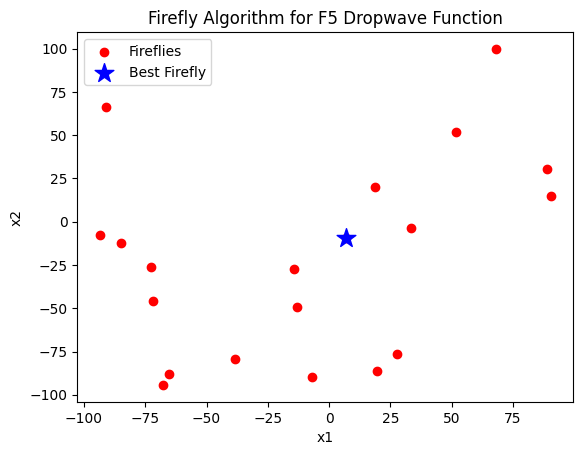

In [7]:
def move_fireflies(population, fitness_values, alpha, gamma):
    population_size, dim = population.shape
    new_population = population.copy()

    for i in range(population_size):
        for j in range(population_size):
            if i != j:
                attractiveness_i = 1 / (1 + fitness_values[i])
                attractiveness_j = 1 / (1 + fitness_values[j])

                if attractiveness_j > attractiveness_i:
                    distance = np.linalg.norm(population[j] - population[i])
                    beta = np.exp(-gamma * distance**2)
                    new_population[i] += alpha * (attractiveness_j - attractiveness_i) * beta * (population[j] - population[i])

    return new_population

# Firefly Algorithm parameters
max_iterations = 100
population_size = 20
dim = 2
alpha = 0.1  # You can choose a suitable value
gamma = 1.0  # Attractiveness parameter

# Initialize fireflies
fireflies = initialize_fireflies(population_size, dim)

# Track the best solution found so far
best_firefly, best_fitness = None, np.inf

for iteration in range(max_iterations):
    # Evaluate, order, and find the best firefly
    fitness_values = evaluate_fireflies(fireflies)
    fireflies, fitness_values = order_fireflies(fireflies, fitness_values)
    current_best_firefly, current_best_fitness = find_the_best_firefly(fireflies, fitness_values)

    # Update the best solution found so far
    if current_best_fitness < best_fitness:
        best_firefly, best_fitness = current_best_firefly, current_best_fitness

    # Move fireflies based on attractiveness
    fireflies = move_fireflies(fireflies, fitness_values, alpha, gamma)

    print(f"Iteration {iteration + 1}: Best Fitness = {best_fitness}")

# Visualize the final population
plt.scatter(fireflies[:, 0], fireflies[:, 1], c='red', marker='o', label='Fireflies')
plt.scatter(best_firefly[0], best_firefly[1], c='blue', marker='*', s=200, label='Best Firefly')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Firefly Algorithm for F5 Dropwave Function')
plt.legend()
plt.show()
